# CAPSTONE FINAL REPORT

## Introduction/Business Problem

In a particular neighborhood (e.g. Tampines) in Singapore, what type of business (e.g. restaurant, provision store, café) should I open? I aim to combine check-in information from Foursquare for businesses in each neighborhood in Singapore with the Resident Household data (e.g. distribution by type of dwelling in each neighborhood, household size, age, household income) from the Department of Statistics Singapore to identify neighborhoods that are most similar to Tampines (or the particular neighborhood under consideration) and predict what types of businesses could be underserved. 

The target audience for this business problem is somebody who is looking to start a business, but isn't sure what are some of the needs that exist in the particular neighborhood. By identifying these gaps (untapped potential), he/she would be able to make a more informed decision regarding the type of business to go into, and to avoid setting up a business that caters to an area that is already well served and hence more competitive. 

## Data

Two main sources of data will be used: 
1. Foursquare location data to extract check-in information for various businesses in each neighborhood, and 
2. Resident Household data from the Department of Statistics Singapore. 

Using the data from 2., similar neighborhoods to Tampines (or the particular neighborhood under consideration) will be identified. Once done, data from Foursquare (e.g. check-in, ratings) for each neighborhood will be used to compare the various neighborhoods to identify potential areas that are underserved in Tampines. 

In [1]:
import numpy as np # library to handle data in a vectorised manner
import pandas as pd # library for data analysis

First, import demographics data from the Department of Statistics Singapore that provides resident population by area and age group.

In [2]:
# import demographics data
demo_chara = pd.read_excel('https://www.singstat.gov.sg/-/media/files/publications/ghs/ghs2015/excel/t1-9.xls',sheet_name='T7(Total)',header = 0)
demo_chara.head()

,85,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,NaN,GENERAL HOUSEHOLD SURVEY 2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,Table 7 Resident Population by Planning Area/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Number
4,NaN,Planning Area,Subzone,Total,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,...,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 & Over


In [3]:
demo_chara.shape

(511, 22)

In [4]:
demo_chara_c = demo_chara

In [5]:
# remove extra rows and columns
demo_chara_c = demo_chara_c.dropna(how = 'all')
demo_chara_c = demo_chara_c.dropna(axis = 1, how = 'all')
demo_chara_c = demo_chara_c.drop(85, axis = 1)
demo_chara_c.columns = demo_chara_c.iloc[3]
demo_chara_c = demo_chara_c.iloc[5:]

In [6]:
demo_chara_c.head()

4,Planning Area,Subzone,Total,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,...,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 & Over
6,Total,Total,3902690,183580,204450,214390,242900,264130,271030,290620,...,316760,303410,315090,295060,240490,182430,102630,81210,51790,41660
8,Ang Mo Kio,Total,174770,6790,7660,8290,9320,10310,11170,12250,...,13710,13000,14010,13800,12980,11050,6670,5140,3250,2300
9,NaN,Ang Mo Kio Town Centre,5020,260,280,320,280,260,310,370,...,490,420,350,320,280,270,160,120,60,50
10,NaN,Cheng San,29770,1290,1180,1290,1400,1570,1830,2490,...,2460,2220,2320,2290,2320,1920,1070,790,480,370
11,NaN,Chong Boon,27900,910,1100,1180,1370,1520,1800,1980,...,2040,2060,2270,2260,2250,1950,1290,920,540,380


In [7]:
# Extract by neighborhood, rather than subzones, and remove total column
demo_char_f = demo_chara_c[demo_chara_c['Subzone'] == 'Total']
demo_char_f.reset_index(drop = True, inplace = True)
demo_char_f = demo_char_f.drop([0])

In [8]:
demo_char_f.rename(columns = {'Planning Area':'Neighborhood'}, inplace = True)
demo_chart_f = demo_char_f.drop(['Subzone'],axis = 1)

In [9]:
demo_char_f.head()

4,Neighborhood,Subzone,Total,0 - 4,5 - 9,10 - 14,15 - 19,20 - 24,25 - 29,30 - 34,...,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 & Over
1,Ang Mo Kio,Total,174770,6790,7660,8290,9320,10310,11170,12250,...,13710,13000,14010,13800,12980,11050,6670,5140,3250,2300
2,Bedok,Total,289750,11690,13400,14750,16930,19450,19860,19270,...,22520,21460,23430,23380,20590,16750,9310,7330,4760,4010
3,Bishan,Total,90700,3430,4330,4710,5520,6860,6460,5720,...,7070,6800,7540,7700,6360,4860,2730,2140,1370,1090
4,Boon Lay,Total,30,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
5,Bukit Batok,Total,139270,5510,6890,7970,9240,10070,10460,9760,...,10980,11310,12190,11770,9370,5990,3060,2230,1450,1090


In [10]:
demo_char_f.shape

(55, 21)

Next, import demographics data from the Department of Statistics Singapore that provides resident household information by area and type of dwelling.

In [11]:
# import data for resident households by type of dwelling

household_D = pd.read_excel('https://www.singstat.gov.sg/-/media/files/publications/ghs/ghs2015/excel/t148-152.xls',sheet_name='T148',header = 0)

In [12]:
household_D.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,NaN,NaN,GENERAL HOUSEHOLD SURVEY 2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,Table 148 Resident Households by Planning Are...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Thousands


In [13]:
household_D.shape

(54, 12)

In [14]:
# remove extra rows and columns
household_D = household_D.dropna(axis = 1, how = 'all')
household_D = household_D.dropna()
household_D.reset_index(inplace = True, drop = True)
household_D.columns=(['Neighborhood','Total','Total HDB Dwelling','1- and 2- Room HDB Flats','3-Room HDB Flats','4-Room HDB Flats','5-Room and Executive Flats','Condominiums and Apartments','Landed Properties','Others'])
household_D = household_D.iloc[1:]

In [15]:
household_D.head()

,Neighborhood,Total,Total HDB Dwelling,1- and 2- Room HDB Flats,3-Room HDB Flats,4-Room HDB Flats,5-Room and Executive Flats,Condominiums and Apartments,Landed Properties,Others
1,Ang Mo Kio,62.6,52.4,5.6,25.5,14.8,6.5,5,4.9,0.3
2,Bedok,92.2,60.4,4,21.8,21,13.6,19.3,12.3,0.3
3,Bishan,27.8,19.7,0.5,2,9.8,7.3,4.9,3.2,0.1
4,Bukit Batok,44,33.5,0.7,9.8,15,8,8.9,1.5,0.2
5,Bukit Merah,55.2,51.3,12,15.9,14.3,9.1,3.6,0.1,0.2


In [16]:
household_D.shape

(29, 10)

Next, import demographics data from the Department of Statistics Singapore that provides resident population by area and household size.

In [17]:
# import data for resident households by household size
household_S = pd.read_excel('https://www.singstat.gov.sg/-/media/files/publications/ghs/ghs2015/excel/t148-152.xls',sheet_name='T151',header = 0)

In [18]:
household_S.shape

(51, 10)

In [19]:
# remove extra rows and columns
household_S = household_S.dropna(axis = 1, how = 'all')
household_S = household_S.dropna()
household_S.reset_index(inplace = True, drop = True)
household_S.columns = household_S.iloc[0]
household_S = household_S.iloc[2:]
household_S.rename(columns = {'Planning Area':'Neighborhood'}, inplace = True)
household_S.reset_index(inplace = True, drop = True)

In [20]:
household_S.head()

,Neighborhood,Total,1 Person,2 Persons,3 Persons,4 Persons,5 Persons,6 or More Persons
0,Ang Mo Kio,62.6,10.4,15,13.3,12,6.7,5.2
1,Bedok,92.2,12.6,20.3,18.8,19.2,12.6,8.9
2,Bishan,27.8,2.7,5.4,6.3,6.3,4.9,2.3
3,Bukit Batok,44,5.2,8.6,10.3,10.6,5.9,3.6
4,Bukit Merah,55.2,11.1,15.8,9.6,10.1,5.4,3.1


In [21]:
household_S.shape

(30, 8)

Merge the demographic data into a single dataframe

In [22]:
# create merged dataframe
merged_household = pd.merge(left = household_S, right = household_D, on = 'Neighborhood')
merged_household = pd.merge(left = merged_household, right = demo_char_f, on = 'Neighborhood')

In [23]:
merged_household.head()

,Neighborhood,Total_x,1 Person,2 Persons,3 Persons,4 Persons,5 Persons,6 or More Persons,Total_y,Total HDB Dwelling,...,40 - 44,45 - 49,50 - 54,55 - 59,60 - 64,65 - 69,70 - 74,75 - 79,80 - 84,85 & Over
0,Ang Mo Kio,62.6,10.4,15,13.3,12,6.7,5.2,62.6,52.4,...,13710,13000,14010,13800,12980,11050,6670,5140,3250,2300
1,Bedok,92.2,12.6,20.3,18.8,19.2,12.6,8.9,92.2,60.4,...,22520,21460,23430,23380,20590,16750,9310,7330,4760,4010
2,Bishan,27.8,2.7,5.4,6.3,6.3,4.9,2.3,27.8,19.7,...,7070,6800,7540,7700,6360,4860,2730,2140,1370,1090
3,Bukit Batok,44,5.2,8.6,10.3,10.6,5.9,3.6,44,33.5,...,10980,11310,12190,11770,9370,5990,3060,2230,1450,1090
4,Bukit Merah,55.2,11.1,15.8,9.6,10.1,5.4,3.1,55.2,51.3,...,12730,11320,11320,11740,10920,10030,6480,5590,3540,3010


In [24]:
import requests # library to handle requests

!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

from sklearn.cluster import KMeans 

Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

# All requested packages already installed.



Find the longitude and latitude information for each neighborhood in Singapore

In [25]:
# extracting Lat Long info for each neighborhood

lat_info = []
long_info = []

import time

for i in range(0,len(merged_household)):
    
    town = merged_household.iloc[i,0]
    address =  str(town) + ", Singapore"
    
#    print(address)
    
    geolocator = Nominatim(user_agent="foursquare_agent")  
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
#    print(address,latitude, longitude)
    lat_info = np.append(lat_info,latitude)
    long_info = np.append(long_info,longitude)
    time.sleep(1)

In [26]:
# Appending lat long info to merged_household dataframe

lat = pd.DataFrame(lat_info)
long = pd.DataFrame(long_info)
temp = pd.concat([lat,long],axis=1)
temp.columns = ['Lat','Long']
merged_household_coord = pd.concat([merged_household,temp],axis=1)

In [27]:
# create map of Singapore using latitude and longitude values

# Singapore Lat Long
address = "Singapore"
geolocator = Nominatim(user_agent="foursquare_agent")  
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

map_singapore = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, neighborhood in zip(merged_household_coord['Lat'], merged_household_coord['Long'], merged_household_coord['Neighborhood']):
    label = folium.Popup(str(merged_household_coord['Neighborhood']), parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_singapore)  
    
map_singapore

Use K Means clustering to identify other neighborhoods that are similar to Tampines

In [28]:
# set number of clusters
kclusters = 3

# remove columns with Strings
df= merged_household.drop(['Neighborhood','Subzone'], 1)
df = df[df.columns.drop(list(df.filter(regex='Total')))]

from sklearn.preprocessing import StandardScaler
df = StandardScaler().fit_transform(df)

# run k-means clustering
kmeans = KMeans(init="k-means++", n_clusters= kclusters, n_init=12)

kmeans.fit(df)

labels = pd.DataFrame(kmeans.labels_)
labels.columns = ['Cluster']

merged_household_coord_ = pd.concat([merged_household_coord,labels],axis = 1)


In [29]:
# create map of Singapore showing clustered neighborhoods

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(merged_household_coord_['Lat'], merged_household_coord_['Long'], merged_household_coord_['Neighborhood'], merged_household_coord_['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Extract names of the other similar neighborhoods

In [30]:
c = merged_household_coord_[merged_household_coord_['Neighborhood'] == 'Tampines']['Cluster']

N_interest = merged_household_coord_[merged_household_coord_['Cluster'] == int(c)]

N_interest = N_interest[['Neighborhood','Lat','Long']]

Define Foursquare credentials and version

In [31]:
CLIENT_ID = '0OGT50X5XRDU5V5PAH0HYBFUXCMC1M4PYNUYTZ2PMJF3N4PK' # your Foursquare ID
CLIENT_SECRET = 'BLRVRECCNGXR02QZAQANBRJNXWAQX0GC034PVBWGYCSTGFPM' # your Foursquare Secret
VERSION = '20200501'
LIMIT = 100
print('Your credentials:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentials:
CLIENT_ID: 0OGT50X5XRDU5V5PAH0HYBFUXCMC1M4PYNUYTZ2PMJF3N4PK
CLIENT_SECRET:BLRVRECCNGXR02QZAQANBRJNXWAQX0GC034PVBWGYCSTGFPM


Using Foursquare, explore each neighborhood to find the businesses that are in each neighborhood

In [32]:
radius = 1000

In [33]:
url = 'https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&ll={},{}&v={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, radius, LIMIT)

In [34]:
import requests

results = requests.get(url).json()

In [35]:
items = results['response']['groups'][0]['items']

Define function that will extract the category of each business

In [36]:
dataframe = json_normalize(items)

filtered_columns = ['venue.name', 'venue.categories'] + [col for col in dataframe.columns if col.startswith('venue.location.')] + ['venue.id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
# filter the category for each row
dataframe_filtered['venue.categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [col.split('.')[-1] for col in dataframe_filtered.columns]

dataframe_filtered.head()

C:\Users\bongewj\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """Entry point for launching an IPython kernel.


,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,cc,city,country,formattedAddress,neighborhood,state,postalCode,id
0,SICC The Lookout,Café,Singapore Island Country Club (Island Location),Island Club Rd.,1.359105,103.818598,"[{'label': 'display', 'lat': 1.359105110539274...",243,SG,Singapore,Singapore,[Singapore Island Country Club (Island Locatio...,NaN,NaN,NaN,4e1838aa14957dc705d4d8ab
1,SICC Swimming Pool,Pool,Singapore Island Country Club (Island Location),180 Island Club Rd.,1.357949,103.818607,"[{'label': 'display', 'lat': 1.357949346778500...",136,SG,Singapore,Singapore,[Singapore Island Country Club (Island Locatio...,NaN,NaN,NaN,4c7c72b2f56a3704fc290846
2,Terentang Trail,Trail,Central Catchment Nature Reserve,NaN,1.356079,103.813523,"[{'label': 'display', 'lat': 1.356079093322095...",674,SG,Singapore,Singapore,"[Central Catchment Nature Reserve, Singapore]",NaN,NaN,NaN,4e478d1562845e1d3ca115bd
3,Windsor Nature Park,Nature Preserve,Venus Drive,NaN,1.359886,103.825420,"[{'label': 'display', 'lat': 1.359886, 'lng': ...",727,SG,Singapore,Singapore,"[Venus Drive, Singapore]",Bishan,NaN,NaN,58fbf5835161137445c4f878
4,TreeTop Walk,Bridge,Central Catchment Nature Reserve,NaN,1.361061,103.811445,"[{'label': 'display', 'lat': 1.361060862779753...",998,SG,Singapore,Singapore,"[Central Catchment Nature Reserve, Singapore]",NaN,NaN,NaN,4b058810f964a52066af22e3


Define function that runs through each neighborhood to extract the list of places in each

In [37]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [38]:
singapore_venues = getNearbyVenues(names = N_interest['Neighborhood'],
                                   latitudes = N_interest['Lat'],
                                   longitudes = N_interest['Long']
                                  )

Bedok
Hougang
Jurong West
Sengkang
Tampines
Woodlands
Yishun


In [39]:
singapore_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bedok,99,99,99,99,99,99
Hougang,66,66,66,66,66,66
Jurong West,73,73,73,73,73,73
Sengkang,38,38,38,38,38,38
Tampines,76,76,76,76,76,76
Woodlands,73,73,73,73,73,73
Yishun,100,100,100,100,100,100


Analysing each neighborhood

In [40]:
# one hot encoding
singapore_onehot = pd.get_dummies(singapore_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
singapore_onehot['Neighborhood'] = singapore_venues['Neighborhood'] 

# find column index of "Neighborhood" column [127]
singapore_onehot.columns.get_loc("Neighborhood")

# move neighborhood column to the first column
fixed_columns = [singapore_onehot.columns[114]] + list(singapore_onehot.columns[1:113]) + list(singapore_onehot.columns[115:])

singapore_onehot = singapore_onehot[fixed_columns]

singapore_onehot.head()

,Neighborhood,Arcade,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Basketball Court,Board Shop,Bookstore,...,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Thrift / Vintage Store,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant
0,Bedok,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Bedok,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Bedok,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Bedok,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Bedok,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Get mean frequency of occurrence of each category

In [41]:
singapore_grouped = singapore_onehot.groupby('Neighborhood').mean().reset_index()
singapore_grouped

,Neighborhood,Arcade,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Basketball Court,Board Shop,Bookstore,...,Supermarket,Sushi Restaurant,Tea Room,Tennis Court,Thai Restaurant,Thrift / Vintage Store,Toy / Game Store,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant
0,Bedok,0.00,0.040404,0.000000,0.000000,0.040404,0.00,0.000000,0.000000,0.010101,...,0.040404,0.020202,0.00,0.000000,0.020202,0.010101,0.000000,0.020202,0.00,0.000000
1,Hougang,0.00,0.045455,0.030303,0.000000,0.015152,0.00,0.000000,0.000000,0.015152,...,0.030303,0.015152,0.00,0.000000,0.015152,0.000000,0.000000,0.030303,0.00,0.000000
2,Jurong West,0.00,0.095890,0.000000,0.000000,0.000000,0.00,0.000000,0.000000,0.013699,...,0.013699,0.013699,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000
3,Sengkang,0.00,0.052632,0.000000,0.000000,0.078947,0.00,0.026316,0.000000,0.000000,...,0.052632,0.026316,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.026316
4,Tampines,0.00,0.013158,0.000000,0.000000,0.052632,0.00,0.026316,0.000000,0.013158,...,0.052632,0.039474,0.00,0.000000,0.026316,0.000000,0.013158,0.000000,0.00,0.000000
5,Woodlands,0.00,0.027397,0.000000,0.013699,0.000000,0.00,0.000000,0.013699,0.000000,...,0.027397,0.013699,0.00,0.013699,0.027397,0.000000,0.000000,0.000000,0.00,0.000000
6,Yishun,0.01,0.050000,0.000000,0.000000,0.010000,0.02,0.000000,0.000000,0.010000,...,0.020000,0.010000,0.02,0.000000,0.040000,0.000000,0.000000,0.020000,0.01,0.000000


In [42]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.1.3


Identify potential businesses by comparing the current frequencies of various businesses in Tampines against the mean frequency of each type of business in the other similar neighborhood

In [43]:
temp = singapore_grouped[singapore_grouped['Neighborhood'] != 'Tampines']

means = temp.mean(axis = 0)

means = pd.DataFrame(means)

tamp_temp = singapore_grouped[singapore_grouped['Neighborhood'] == 'Tampines']

tamp_temp = tamp_temp.drop(tamp_temp.columns[0], axis = 1)
tamp_temp = pd.DataFrame(tamp_temp)

tamp_temp = tamp_temp.transpose()

means.columns = ['Mean']
means['Tampines'] = tamp_temp
means

,Mean,Tampines
Arcade,0.001667,0.000000
Asian Restaurant,0.051963,0.013158
Athletics & Sports,0.005051,0.000000
BBQ Joint,0.002283,0.000000
Bakery,0.024084,0.052632
...,...,...
Thrift / Vintage Store,0.001684,0.000000
Toy / Game Store,0.000000,0.013158
Vegetarian / Vegan Restaurant,0.011751,0.000000
Video Game Store,0.001667,0.000000


Identify the top 10 businesses based on magnitude of difference in frequencies

C:\Users\bongewj\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\bongewj\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


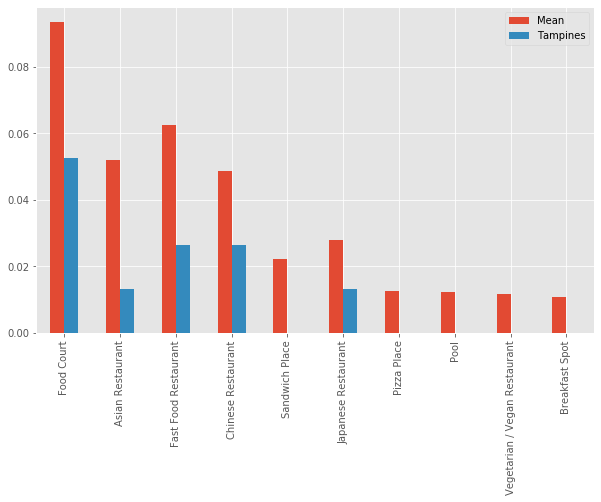

In [44]:
tamp_opp = means[means['Tampines']<means['Mean']]
#tamp_opp['difference'] = tamp_opp['Tampines'] - tamp_opp['Mean']
a = np.asarray(tamp_opp.loc[:,'Mean']-tamp_opp.loc[:,'Tampines'])
tamp_opp['Difference'] = a
tamp_opp.sort_values(by = ['Difference'],ascending = False, inplace = True)

tamp_plot = tamp_opp.head(10)
tamp_plot = tamp_plot[['Mean','Tampines']]

tamp_plot.plot(kind='bar', figsize=(10, 6))
